First create a (pseudo)-random distribution.
Enter a population size:1000
...
Here's what the population distribution looks like.


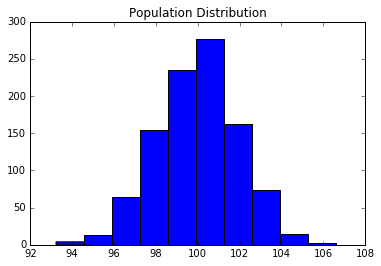

The population mean is: 100.021111485
The population standard deviation is: 1.94592416161
For the second step, enter the size of the samples to draw --with replacement-- from the population distribution, and how many times to repeat this procedure in order to create a distribution of sample means.
Enter the sample size:50
Enter the number of times to repeat the experiment:100
Here's what the sample mean distribution looks like.


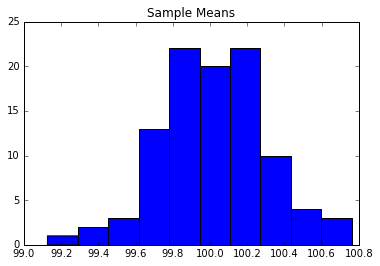

The mean of the sample means is: 100.019038137
The standard deviation of the sample means is: 0.285638077428
The poportion of time when the population mean falls within the confidence intervals is 0.93

Perform sampling procedure again? Note that if no, then the population distribution will be lost.


KeyboardInterrupt: 

In [23]:
# Code for exploring the Central Limit Theorem
# Need NumPy version 1.7 or greater and Matplotlib version

# Uncomment the next line if using IPython for inline plotting
# %matplotlib inline

import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

p = 0.1
CF = 0.95

def create_pop(n, name=None):
    # A
    if name == None:
        distrib = 1000 * np.random.random_sample((n, ))
    elif name == 'binomial':
        distrib = np.random.binomial(n, p, (n, ))
    elif name == 'geometric':
        distrib = 1000 * np.random.geometric(p, (n, ))
    elif name == 'normal':
        distrib = np.random.normal(loc=100, scale=2, size=(n, ))
    elif name == 'exponential':
        distrib = np.random.exponential(size=(n,))
    return distrib

def graph_distribution(dist, name):
    plt.hist(dist)
    plt.title(name)
    plt.show()

def sample_procedure(dist):
    sample_size = int(raw_input("Enter the sample size:"))
    sample_repeats = int(raw_input("Enter the number of times to repeat the experiment:"))
    sample_means = []
    correct = 0
    margin_error = norm.ppf((1 - CF) / 2 + CF) * (pop_std / (sample_size ** 0.5))
    for _ in range(sample_repeats):        
        # B
        sample = np.random.choice(dist, (sample_size, ))
        this_mean = np.mean(sample)
        if this_mean - margin_error <= pop_mean <= this_mean + margin_error:
            correct += 1
        sample_means.append(this_mean)
    
    print "Here's what the sample mean distribution looks like."
    
    plt.hist(sample_means)
    plt.title('Sample Means')
    plt.show()
    
    print "The mean of the sample means is:", np.mean(sample_means)
    print "The standard deviation of the sample means is:", np.std(sample_means)
    print "The poportion of time when the population mean",\
            "falls within the confidence intervals is", correct / float(sample_repeats)
    print ""
    
#####################################

print "First create a (pseudo)-random distribution."
population_size = int(raw_input("Enter a population size:"))
print "..."
population = create_pop(population_size, 'normal')

print "Here's what the population distribution looks like."
graph_distribution(population, 'Population Distribution')
pop_mean = np.mean(population) 
pop_std = np.std(population) 
print "The population mean is:", pop_mean
print "The population standard deviation is:", pop_std
print "For the second step, enter the size of the samples to draw --with replacement-- from the population distribution, and how many times to repeat this procedure in order to create a distribution of sample means."

sample_flag = True

while sample_flag:
    sample_procedure(population)
    print "Perform sampling procedure again? Note that if no, then the population distribution will be lost."
    decision = raw_input("Type y or n:")
    if decision == 'n':
        sample_flag = False
    else:
        print "Doing procedure again."
        
